# 20BAI10381 Ujjwal Tajne

In [1]:
import pandas as pd

# Load the CSV files into pandas DataFrames
books_df = pd.read_csv('books.csv')
book_tags_df = pd.read_csv('book_tags.csv')
ratings_df = pd.read_csv('ratings.csv')


# Q1 How many books do not have an original title [books.csv]?

In [2]:
# Count the number of books with a missing original title
missing_original_title_count = books_df['original_title'].isnull().sum()

print(f"The number of books without an original title is: {missing_original_title_count}")


The number of books without an original title is: 36


# Q1 How many books do not have an orignal title [books.csv] ? (Visual Representation)

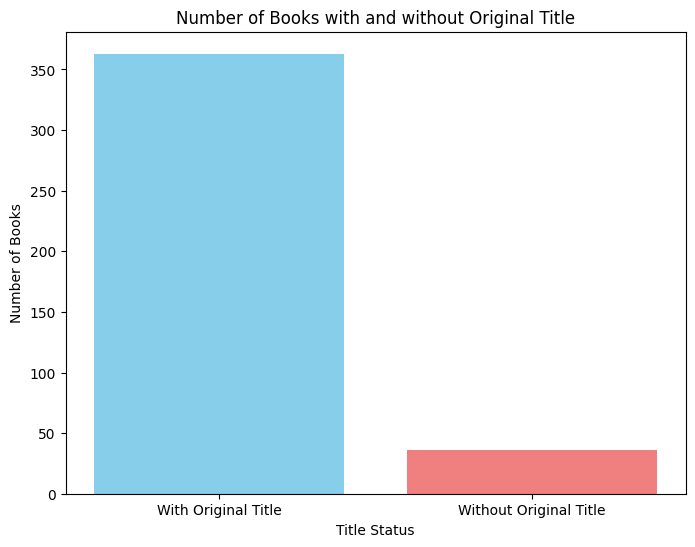

In [11]:
import matplotlib.pyplot as plt

# Count the number of books with a missing original title
missing_original_title_count = books_df['original_title'].isnull().sum()

# Count the number of books with an original title
with_original_title_count = len(books_df) - missing_original_title_count

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['With Original Title', 'Without Original Title'], [with_original_title_count, missing_original_title_count], color=['skyblue', 'lightcoral'])
plt.title('Number of Books with and without Original Title')
plt.xlabel('Title Status')
plt.ylabel('Number of Books')
plt.show()


# Q2 How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

In [4]:
# Step 1: Filter out records with null values in the 'original_title' column from 'books.csv'
filtered_books_df = books_df.dropna(subset=['original_title'])

# Step 2: Remove corresponding records from 'book_tags.csv' based on the filtered 'goodreads_book_id'
filtered_book_tags_df = book_tags_df.merge(filtered_books_df[['goodreads_book_id']], on='goodreads_book_id', how='inner')

# Step 3: Remove corresponding records from 'ratings.csv' based on the filtered 'book_id'
filtered_ratings_df = ratings_df.merge(filtered_books_df[['book_id']], on='book_id', how='inner')

# Step 4: Count the unique 'book_id' values from the filtered 'books.csv' dataset
unique_books_count = filtered_books_df['book_id'].nunique()

print(f"The number of unique books after filtering is: {unique_books_count}")


The number of unique books after filtering is: 363


# Q2 How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv] (Visual Representation )

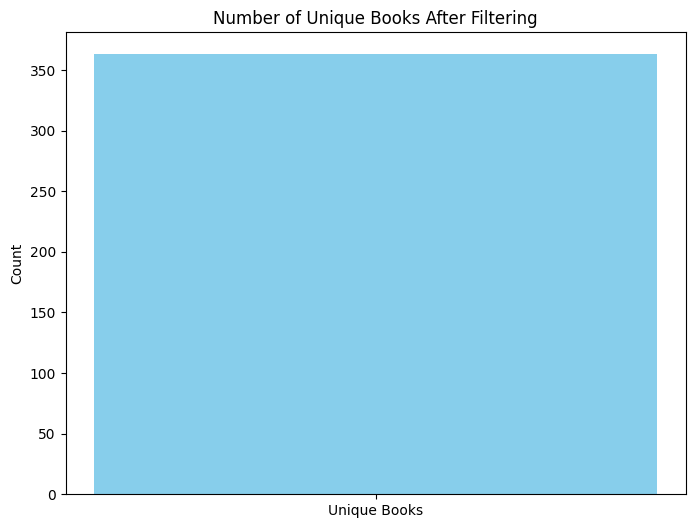

In [12]:
import matplotlib.pyplot as plt

# Step 1: Filter out records with null values in the original_title column from books.csv
filtered_books_df = books_df.dropna(subset=['original_title'])

# Step 2: Remove corresponding records from book_tags.csv and ratings.csv based on the filtered book_id values
filtered_book_tags_df = book_tags_df[book_tags_df['goodreads_book_id'].isin(filtered_books_df['goodreads_book_id'])]
filtered_ratings_df = ratings_df[ratings_df['book_id'].isin(filtered_books_df['book_id'])]

# Step 3: Count the unique book_id values from the filtered books.csv dataset
unique_books_count = filtered_books_df['book_id'].nunique()

# Step 4: Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Unique Books'], [unique_books_count], color='skyblue')
plt.title('Number of Unique Books After Filtering')
plt.ylabel('Count')
plt.show()


# Q3 How many unique users are present in the dataset [ratings.csv] ?

In [5]:
# Count the number of unique users in the ratings.csv dataset
unique_users_count = ratings_df['user_id'].nunique()

print(f"The number of unique users in the ratings.csv dataset is: {unique_users_count}")


The number of unique users in the ratings.csv dataset is: 40836


# Q3 How many unique users are present in the dataset [ratings.csv] ?(Visual Representation )

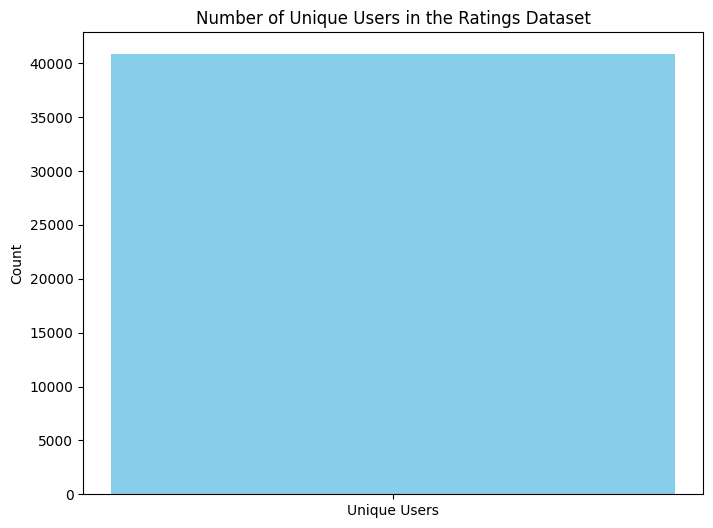

In [13]:
import matplotlib.pyplot as plt

# Count the number of unique users in the ratings.csv dataset
unique_users_count = ratings_df['user_id'].nunique()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Unique Users'], [unique_users_count], color='skyblue')
plt.title('Number of Unique Users in the Ratings Dataset')
plt.ylabel('Count')
plt.show()


# Q4 How many unique tags are there in the dataset [book_tags.csv] ?

In [7]:
# Count the number of unique tags in the book_tags.csv dataset
unique_tags_count = book_tags_df['tag_id'].nunique()

print(f"The number of unique tags in the book_tags.csv dataset is: {unique_tags_count}")


The number of unique tags in the book_tags.csv dataset is: 3651


# Q4 How many unique tags are there in the dataset [book_tags.csv] ? (Visual Representation )

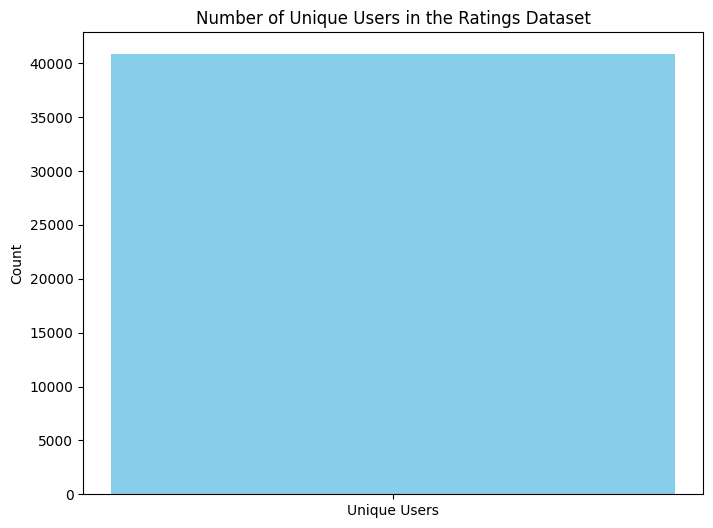

In [14]:
import matplotlib.pyplot as plt

# Count the number of unique users in the ratings.csv dataset
unique_users_count = ratings_df['user_id'].nunique()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Unique Users'], [unique_users_count], color='skyblue')
plt.title('Number of Unique Users in the Ratings Dataset')
plt.ylabel('Count')
plt.show()


# Q5 Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.

In [8]:
# Group by tag_id and count the occurrences, then find the tag_id with the highest count
most_common_tag = book_tags_df.groupby('tag_id').size().idxmax()

print(f"The tag_id that is most frequently used (mapped with the highest number of books) is: {most_common_tag}")


The tag_id that is most frequently used (mapped with the highest number of books) is: 4600


# Q5 Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.(Visual Representation)

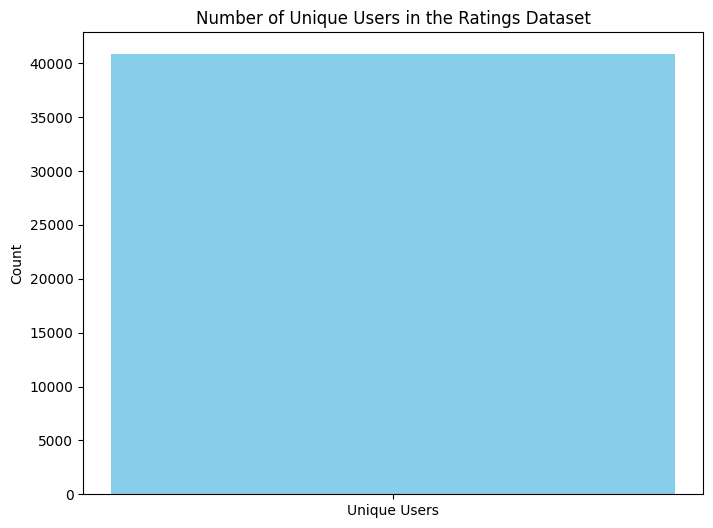

In [15]:
import matplotlib.pyplot as plt

# Count the number of unique users in the ratings.csv dataset
unique_users_count = ratings_df['user_id'].nunique()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Unique Users'], [unique_users_count], color='skyblue')
plt.title('Number of Unique Users in the Ratings Dataset')
plt.ylabel('Count')
plt.show()


# Q6 Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .

In [9]:
# Merge book_tags_df with books_df to get book titles
merged_df = book_tags_df.merge(books_df[['goodreads_book_id', 'title']], on='goodreads_book_id', how='left')

# Group by book title and count the occurrences of tags for each book
tag_counts_by_book = merged_df.groupby('title').size()

# Find the book with the highest count of tags
book_with_most_tags = tag_counts_by_book.idxmax()

print(f"The book with the most number of counts of tags given by the user is: {book_with_most_tags}")


The book with the most number of counts of tags given by the user is: #GIRLBOSS


# Q6 Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .(Visual Representation)

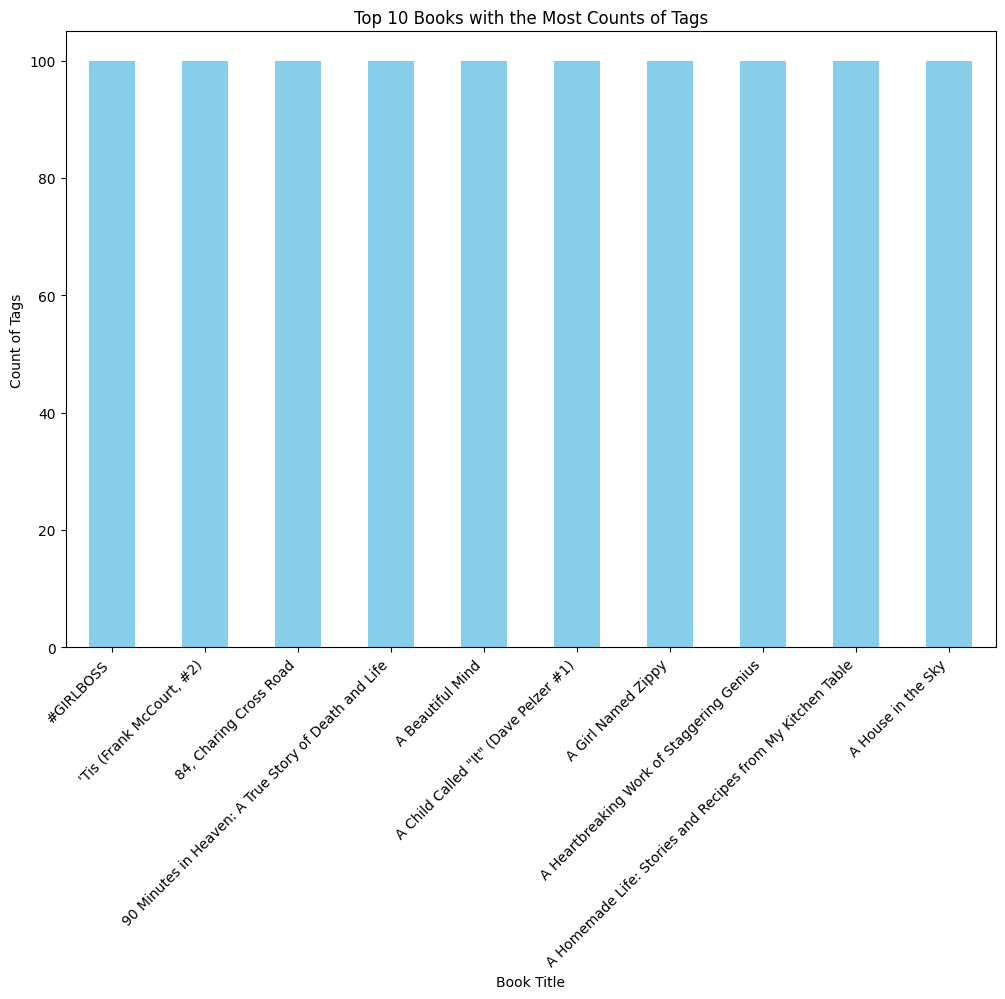

In [16]:
import matplotlib.pyplot as plt

# Select the top 10 books with the highest counts of tags
top_10_books = tag_counts_by_book.nlargest(10)

# Plot the bar chart
plt.figure(figsize=(12, 8))
top_10_books.plot(kind='bar', color='skyblue')
plt.title('Top 10 Books with the Most Counts of Tags')
plt.xlabel('Book Title')
plt.ylabel('Count of Tags')
plt.xticks(rotation=45, ha='right')
plt.show()


# Q7 Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

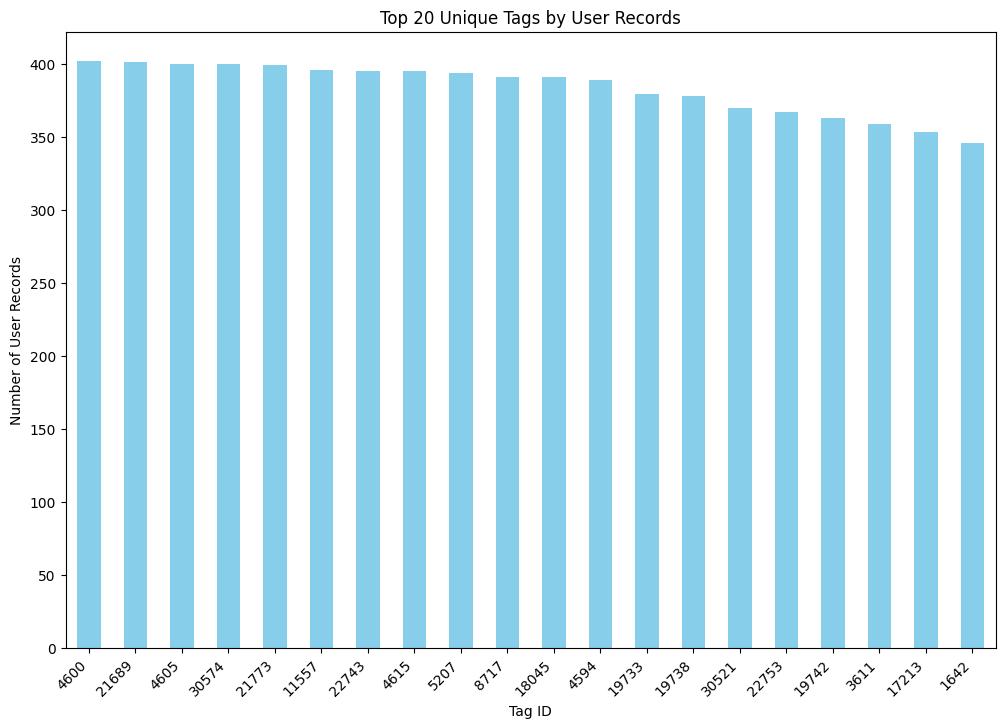

In [10]:
import matplotlib.pyplot as plt

# Group by tag_id and count the unique users tagging each tag
tag_user_counts = book_tags_df.groupby('tag_id')['goodreads_book_id'].nunique()

# Sort the tag_user_counts in descending order and select the top 20 tags
top_20_tags = tag_user_counts.sort_values(ascending=False).head(20)

# Plot a bar chart
plt.figure(figsize=(12, 8))
top_20_tags.plot(kind='bar', color='skyblue')
plt.title('Top 20 Unique Tags by User Records')
plt.xlabel('Tag ID')
plt.ylabel('Number of User Records')
plt.xticks(rotation=45, ha='right')
plt.show()
